# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Delvin Nuryadi
- **Email:** delvinnr19@gmail.com
- **ID Dicoding:** delvinnuryadi

## Menentukan Pertanyaan Bisnis

- Season manakah yang paling banyak casual usersnya?
- Bagaimana trend pengguna casual bike sharing pada tahun 2012?
- Berapa persentase perbandingan pengguna casual ditahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv(r"Data\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Melakukan penilaian data mulai dari type data, nama column dan pengecekan missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


berdasarkan informasi di atas diperlukan penyesuaian tipe data yang tidak sesuai dan nama kolom agar lebih mudah dimengerti.

selanjutnya cek missing value dan duplicate data

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.duplicated().sum()

0

tidak ada missing value dan duplicate pada data diatas, karena tidak ada maka langsung ke tahap cleaning

### Cleaning Data

melakukan rename pada kolom

In [8]:
col_rename = {'dteday' : 'date', 'yr' : 'year', 'mnth': 'month', 'temp':'temperature', 'hum' : 'humidity', 'cnt' : 'total'}
df.rename(columns=col_rename, inplace=True)
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   date         731 non-null    object 
 2   season       731 non-null    int64  
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temperature  731 non-null    float64
 10  atemp        731 non-null    float64
 11  humidity     731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  total        731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


mengubah data type column 'date' menjadi 'datetime'

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: datet

mengubah value pada season menjadi springer, summer, fall, winter

In [11]:
value_season_rename = {
    1 : 'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}
df["season"] = df["season"].map(value_season_rename)
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah value column 'month' dari index angka menjadi nama bulan

In [12]:
df["month"] = df["month"].apply(lambda x: calendar.month_name[x]).astype(str)

df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,0,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah value year dari index angka menjadi tahunnya

In [13]:
value_year_rename = {
    0 : "2011",
    1 : "2012"
}
df["year"] = df["year"].map(value_year_rename)
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
df.describe()

,instant,date,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menganalisis banyaknya user pada setiap seasonnya pada kedua tahun 2011 dan 2012

In [15]:
byseason_users_df = df.groupby("season")["casual"].sum().reset_index()
byseason_users_df

,season,casual
0,fall,226091
1,springer,60622
2,summer,203522
3,winter,129782


membuat dataframe khusus 2011

In [16]:
year_2011_df = df[df["year"] == "2011"]
year_2011_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


membuat dataframe khusus 2012

In [17]:
year_2012_df = df[df["year"] == "2012"]
year_2012_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
365,366,2012-01-01,springer,2012,January,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,springer,2012,January,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,springer,2012,January,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,springer,2012,January,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,springer,2012,January,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


Mengganti setiap value pada kolom date menjadi nama bulan sebagai perwakilannya dan menghitung jumlah casual user setiap bulannya

In [18]:
# mengganti format value pada kolom date dengan nama bulan, dan mengagregasi casual user
monthly_casual_2012_df = year_2012_df.resample(rule='M', on="date").agg({
    'casual' : 'sum'
})

monthly_casual_2012_df.index = monthly_casual_2012_df.index.strftime('%B')
monthly_casual_2012_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_2484\3392770402.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_casual_2012_df = year_2012_df.resample(rule='M', on="date").agg({


,casual
date,
January,8969
February,8721
March,31618
April,38456
May,44235
June,43294
July,41705
August,43197
September,43778


melihat jumlah casual users pada setiap tahun

In [19]:
byyear_casual_df = df.groupby("year")["casual"].sum().reset_index()
byyear_casual_df

,year,casual
0,2011,247252
1,2012,372765


mengecek kolom numeric pada dataset

In [20]:
numerical = []
for col in df.columns:
    if df[col].dtype != 'O' and df[col].dtype !='datetime64[ns]':
        numerical.append(col)
print(f"ada {len(numerical)} numerical kolom dari {len(df.columns)} yang ada. yaitu \n {numerical}")

ada 12 numerical kolom dari 16 yang ada. yaitu 
 ['instant', 'holiday', 'weekday', 'workingday', 'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total']


## Visualization & Explanatory Analysis

### Pertanyaan 1: Season manakah yang paling banyak casual usersnya?

mengecek casual user tiap season

In [21]:
byseason_users_df

,season,casual
0,fall,226091
1,springer,60622
2,summer,203522
3,winter,129782


membuat visualisasi casual user by season

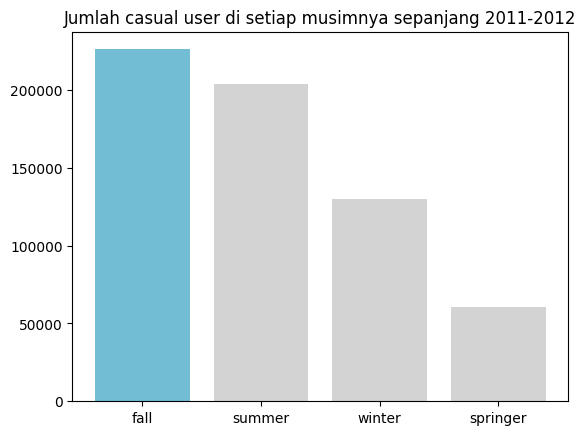

In [22]:
byseason_users_df = byseason_users_df.sort_values("casual", ascending=False)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.bar(byseason_users_df["season"], byseason_users_df["casual"], color = colors)
plt.title("Jumlah casual user di setiap musimnya sepanjang 2011-2012")
plt.show()

### Pertanyaan 2: Bagaimana trend pengguna casual bike sharing pada tahun 2012

mengecek jumlah casual user tiap bulan sepanjang 2012

In [23]:
monthly_casual_2012_df

,casual
date,
January,8969
February,8721
March,31618
April,38456
May,44235
June,43294
July,41705
August,43197
September,43778


membuat visualisasi trend casual user di tahun 2012

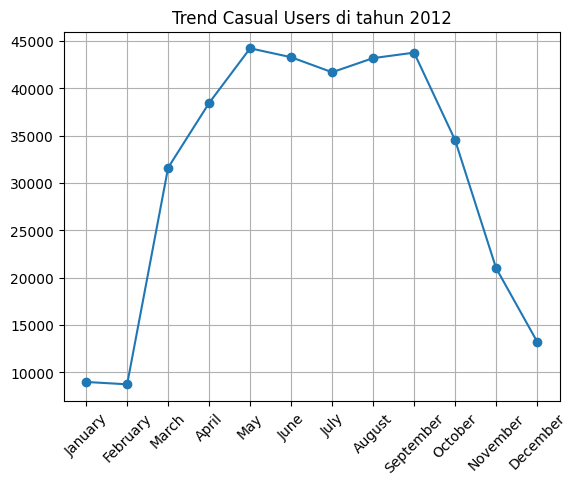

In [24]:
plt.title("Trend Casual Users di tahun 2012")
plt.plot(monthly_casual_2012_df.index, monthly_casual_2012_df["casual"], marker= 'o')
plt.xticks(rotation = 45)
plt.grid(True)

### Pertanyaan 3: Berapa persentase perbandingan pengguna casual ditahun 2011 dan 2012?

membuat pie chart perbandingan casual user tahun 2011 vs 2012

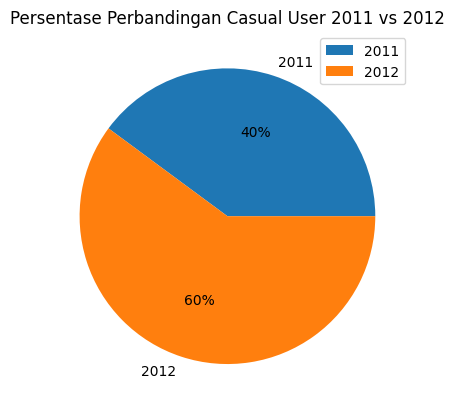

In [25]:
labels = ["2011", "2012"]
plt.pie(byyear_casual_df["casual"],
        labels=labels,
        autopct='%1.0f%%')
plt.legend()
plt.title("Persentase Perbandingan Casual User 2011 vs 2012")
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Berdasarkan data diatas dapat dilihat bahwa season **fall** memiliki jumlah casual user terbanyak dibandingkan dengan season lainnya sepanjang tahun 2011 dan 2012
- Conclusion pertanyaan 2: Pada tahun 2012 dapat dilihat bahwa casual users naik drastis hingga puncaknya pada bulan **mei**, dan menurun ketika mendekati akhir tahun
- Conclusion pertanyaan 3: Dapat dilihat bahwa casual user pada tahun **2012** lebih banyak yaitu **60%** ketimbang casual user pada tahun **2011** yang hanya **40%**

Download file yang sudah di clean

In [26]:
# df.to_csv("clean_df.csv", index=False)